In [2]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import math

import density_contour

# plot inline figures
%matplotlib inline 

# to make saved pdf figures have real text, not outlines
matplotlib.rcParams['pdf.fonttype'] = 42 
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
############# THINGS TO MODIFY

# Read into pandas DataFrames
datapath="/Users/zanejobe/Dropbox/20 Published papers/2019 Fryer - TDR - Thinning Rates/Seaborn/"
filename="LobeSubEnviro_TH_TR_Enviro"

filename2='PLDataLOGGED_TH_TR_Dist_OneGroup'

# specify export file name
figname="LobeSubEnviro_TH_TR_All"


In [4]:
# import data
df = pd.read_csv(datapath + filename + '.txt', header=None, engine='python', sep='  ', names=['th', 'tr', 'group']) # throws a warning because the file is delimited by multiple spaces, and python expects only 1 space

pl = pd.read_csv(datapath + filename2 + '.txt', header=None, engine='python', sep='  ', names=['th', 'tr', 'dist', 'group']) # throws a warning because the file is delimited by multiple spaces, and python expects only 1 space

[Text(0,0,'0.001'),
 Text(0,0.2,'0.01'),
 Text(0,0.4,'0.1'),
 Text(0,0.6,'1.0'),
 Text(0,0.8,'10.0')]

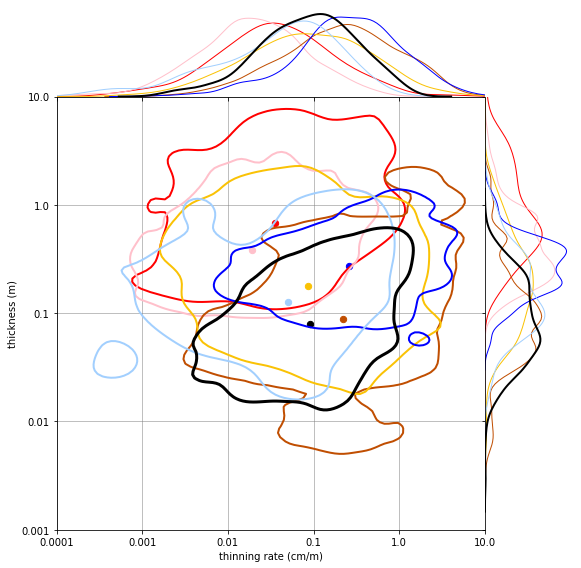

In [4]:
xlab="thinning rate (cm/m)"
ylab="thickness (m)"

g = sns.JointGrid("tr", "th", df, size=8, space=0)

colors = ["red", "pink", "xkcd:burnt orange", "xkcd:goldenrod","blue", "xkcd:baby blue"] 
# colors correpsond to "group" values: 1=confined proximal, 2=confined distal, 3=semiconfined proximal, 4=semiconfined distal, 5=unconfined proximal, 6=unconfined distal, 

for (group, values), c in zip(df.groupby("group"), colors):
    # plot the marginal KDEs for x and y
    sns.kdeplot(values["tr"], ax=g.ax_marg_x, color=c, linewidth=1, shade=False, legend=False)
    sns.kdeplot(values["th"], ax=g.ax_marg_y, color=c, linewidth=1, vertical=True, shade=False, legend=False)

    # plot the median values
    g.ax_joint.scatter(values["tr"].median(),values["th"].median(), color=c, s=40)
    
    # now plot the 2D contour map
    for level in np.array([0.9]): # or could say np.linspace(0.1, 0.9, 9)
        density_contour.bivar_kde_contour(values["tr"], values["th"], frac=level, ax=g.ax_joint, color=c, alpha=1, linewidths=2)
        
# NOW PLOT POINT LOMA ON TOP
sns.kdeplot(pl.tr, ax=g.ax_marg_x, color='black', linewidth=2, shade=False, legend=False)
sns.kdeplot(pl.th, ax=g.ax_marg_y, color='black', linewidth=2, vertical=True, shade=False, legend=False)

# plot the median values
g.ax_joint.scatter(pl.tr.median(),pl.th.median(), color='black', s=40)
    
# now plot the 2D contour map
for level in np.array([0.9]): # or could say np.linspace(0.1, 0.9, 9)
     density_contour.bivar_kde_contour(pl.tr, pl.th, frac=level, ax=g.ax_joint, color='black', alpha=1, linewidths=3)

xlim=[-6,-1]
ylim=[-3,1]
        
g.ax_joint.set_xlim(xlim)
g.ax_joint.set_ylim(ylim)
g.ax_joint.grid(color='grey', linestyle='-', linewidth=0.5)  
g.ax_joint.set_xlabel(xlab) 
g.ax_joint.set_ylabel(ylab) 

xtick=np.arange(xlim[0],xlim[1]+1,1)
g.ax_joint.set_xticks(xtick) 

xticklabel=np.arange(xlim[0]+2,xlim[1]+3,1) # add 2 (i.e., 100 in log space) to each to convert m/m to cm/m
xticklabel=xticklabel.astype(float)
g.ax_joint.set_xticklabels(np.power(10,xticklabel)) 

ytick=np.arange(ylim[0],ylim[1]+1,1)
g.ax_joint.set_yticks(ytick) 
yticklabel=np.arange(ylim[0],ylim[1]+1,1) 
yticklabel=yticklabel.astype(float)
g.ax_joint.set_yticklabels(np.power(10,yticklabel)) 

plt.savefig(figname + ".pdf", transparent=True)


In [7]:
# display median values for each lobe sub envt
for group, values in df.groupby("group"):
    print(group,np.power(10,values["tr"].median()),'thinning rate cm/m')
    print(group,np.power(10,values["th"].median())*100,'thickness cm')
    print('n=',len(values))
    # "group" values are: 
    # 1=confined proximal, 
    # 2=confined distal, 
    # 3=semiconfined proximal, 
    # 4=semiconfined distal, 
    # 5=unconfined proximal, 
    # 6=unconfined distal


1.0 0.0003501872259975698 thinning rate cm/m
1.0 67.79999939629236 thickness cm
n= 369
2.0 0.00019352659255140073 thinning rate cm/m
2.0 38.03924294100691 thickness cm
n= 2362
3.0 0.0021920204424719565 thinning rate cm/m
3.0 8.800000564314155 thickness cm
n= 9710
4.0 0.0008611400739563 thinning rate cm/m
4.0 18.00000020295098 thickness cm
n= 1474
5.0 0.002561042880002001 thinning rate cm/m
5.0 27.499999757463595 thickness cm
n= 478
6.0 0.0005048130809252004 thinning rate cm/m
6.0 12.600000141652057 thickness cm
n= 169
